# Stroke-Prediction (Classification Problem)

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action="ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

In [2]:
# importing dataset
df = pd.read_csv("/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


**Data Attributes**

* id: unique identifier
* gender: "Male", "Female" or "Other"
* age: age of the patient
* hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* ever_married: "No" or "Yes"
* work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* Residence_type: "Rural" or "Urban"
* avg_glucose_level: average glucose level in blood
* bmi: body mass index
* smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
* stroke: 1 if the patient had a stroke or 0 if not

In [3]:
# Datatypes of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
# Statistical data
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
# Checking dor null values
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
# shape of our data
df.shape

(5110, 12)

In [7]:
# dropping rows with null values
df = df.dropna(axis=0)
df = df.drop(columns="id")

In [8]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# Data Visualization

In [9]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


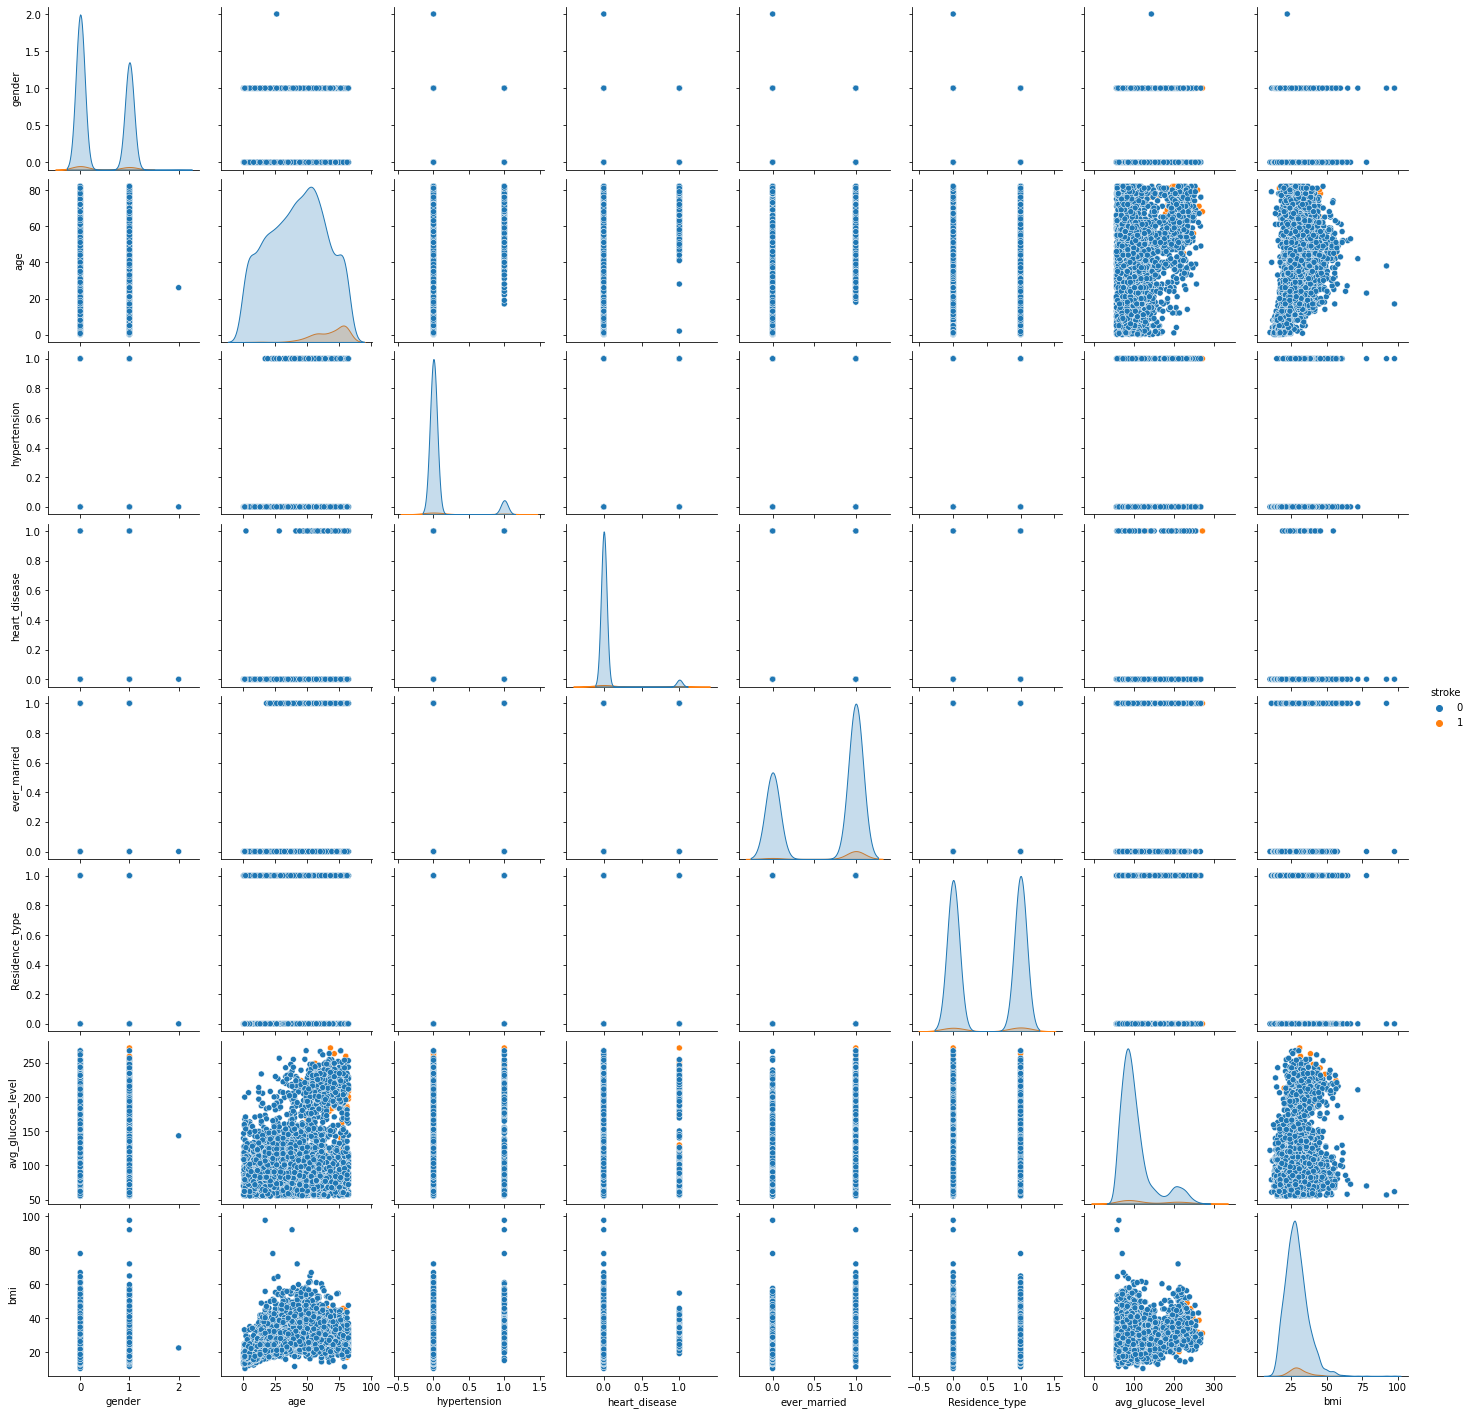

In [46]:
sns.pairplot(df, hue="stroke",data=df)
plt.show()

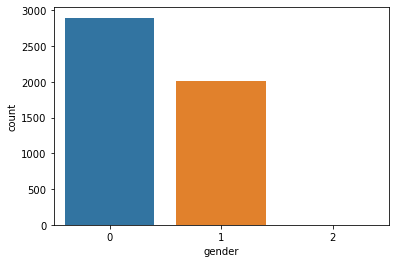

In [48]:
# countplots
sns.countplot(df["gender"])
plt.show()

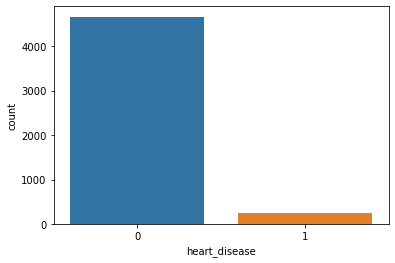

In [50]:
sns.countplot(df["heart_disease"])
plt.show()

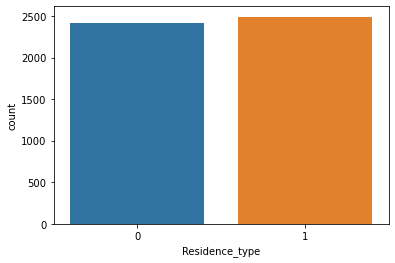

In [51]:
sns.countplot(df["Residence_type"])
plt.show()

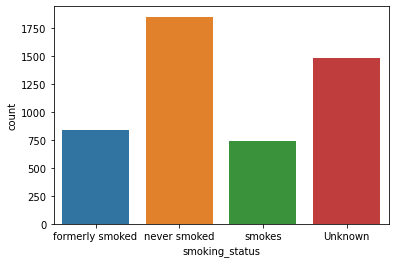

In [52]:
sns.countplot(df["smoking_status"])
plt.show()

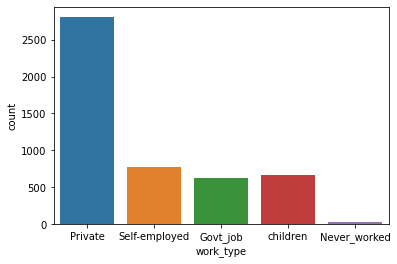

In [53]:
sns.countplot(df["work_type"])
plt.show()

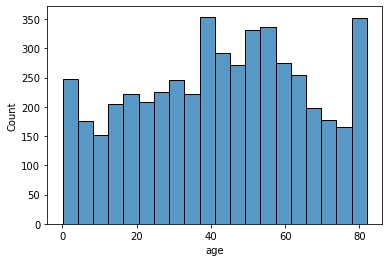

In [57]:
sns.histplot(df["age"])
plt.show()

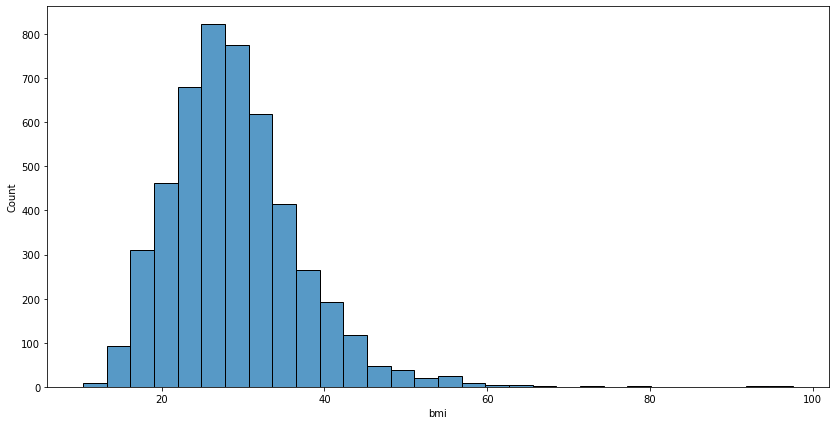

In [61]:
plt.figure(figsize=(14,7))
sns.histplot(df["bmi"],bins=30)
plt.show()

# Feature Engineering

In [11]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
df1 = df.apply(le.fit_transform)

In [22]:
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3734,239,1,1
2,1,101,0,1,1,2,0,2429,198,2,1
3,0,70,0,0,1,2,1,3309,217,3,1
4,0,100,1,0,1,3,0,3318,113,2,1
5,1,102,0,0,1,2,1,3367,163,1,1


In [28]:
x = df1.drop(columns="stroke")
y = df1.stroke

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=24)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3927, 10)
(982, 10)
(3927,)
(982,)


In [30]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
557,1,67,0,0,1,2,1,2351,282,0
4514,0,96,1,0,1,3,0,3443,134,2
892,0,48,0,0,0,2,0,2381,74,2
1254,0,66,0,0,1,2,0,1175,263,2
343,1,85,0,0,1,0,1,3798,219,1
...,...,...,...,...,...,...,...,...,...,...
2306,0,55,0,0,0,2,0,1530,257,0
3636,0,56,0,0,0,2,0,2927,111,2
385,0,58,0,0,1,2,1,1771,165,2
956,0,36,0,0,0,3,1,1687,194,2


In [31]:
# Scaling of data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model Selection

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
report = classification_report(y_pred, y_test)
print(report)
print("Accuracy of Random Forest Classifier Model:", accuracy_score(y_pred,y_test)*100,"%")

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       982
           1       0.00      0.00      0.00         0

    accuracy                           0.96       982
   macro avg       0.50      0.48      0.49       982
weighted avg       1.00      0.96      0.98       982

Accuracy of Random Forest Classifier Model: 96.13034623217924 %


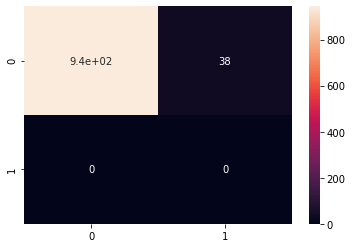

In [39]:
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(data=cm, annot=True)
plt.show()

In [42]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model2 = SVC()
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)
report2 = classification_report(y_pred2, y_test)
print(report2)
print("Accuracy of SVM Model:", accuracy_score(y_pred2,y_test)*100,"%")

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       982
           1       0.00      0.00      0.00         0

    accuracy                           0.96       982
   macro avg       0.50      0.48      0.49       982
weighted avg       1.00      0.96      0.98       982

Accuracy of SVM Model: 96.13034623217924 %


In [44]:
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression()
model3.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)
report3 = classification_report(y_pred3, y_test)
print(report3)
print("Accuracy of Logistic Regression Model:", accuracy_score(y_pred3,y_test)*100,"%")

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       982
           1       0.00      0.00      0.00         0

    accuracy                           0.96       982
   macro avg       0.50      0.48      0.49       982
weighted avg       1.00      0.96      0.98       982

Accuracy of Logistic Regression Model: 96.13034623217924 %


* Author: Purvit Vashishtha
* Created on : 30.03.2021 at 11:55:40 pm